# Import modules

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

# Lấy dataset

In [2]:
df=pd.read_csv("../data/Admission_Predict_Ver1.1.csv")
df=df.rename(index=str, columns={"GRE Score": "GRE", "TOEFL Score": "TOEFL", "Chance of Admit ": "Admission_Chance"})
df=df.drop("Serial No.",axis=1)
df.head(10)

,GRE,TOEFL,University Rating,SOP,LOR,CGPA,Research,Admission_Chance
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
5,330,115,5,4.5,3.0,9.34,1,0.90
6,321,109,3,3.0,4.0,8.20,1,0.75
7,308,101,2,3.0,4.0,7.90,0,0.68
8,302,102,1,2.0,1.5,8.00,0,0.50
9,323,108,3,3.5,3.0,8.60,0,0.45


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE                500 non-null    int64  
 1   TOEFL              500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Admission_Chance   500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 35.2+ KB


# Hiển thị dataset

<AxesSubplot:>

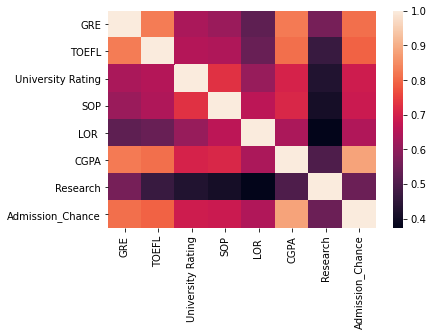

In [4]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

# Tạo model

In [5]:
model = Sequential(name = 'Regression')
model.add(Dense(8, input_shape=(7,), activation='relu')) 
# Nếu input chỉ có 1 chiều thì bắt buộc phải dể trống giá trị thứ 2 của tuple (dimenson, )
# activation: 'relu', 'sigmoid', 'tanh', 'linear'.... xem thêm: https://faroit.com/keras-docs/2.0.2/layers/core/#activation
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='relu'))
model.compile(loss='mean_squared_error', optimizer='adam')
# compile: dùng để thiết lập hàm loss, optimizer
# loss: 'mean_squared_error', 'binary_crossentropy'... xem thêm: https://faroit.com/keras-docs/2.0.2/losses/
# optimizer: 'adam', 'sgd', 'rmsprop', 'adagrad'... xem thêm: https://faroit.com/keras-docs/2.0.2/optimizers/
model.summary()

Model: "Regression"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 64        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 27        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 4         
Total params: 95
Trainable params: 95
Non-trainable params: 0
_________________________________________________________________


# Tách X, Y

In [6]:
X=np.asarray(df.drop("Admission_Chance",axis=1))
Y=np.asarray(df["Admission_Chance"])

# Train-test split, scale

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
     X,Y, test_size=0.2, random_state=1)
from sklearn.preprocessing import MinMaxScaler
scaler =  MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

# Train 

In [8]:
history = model.fit(x=X_train, y=y_train, epochs=40,batch_size = 3) 
# Một Epoch được tính là khi đưa tất cả dữ liệu vào mạng neural network 1 lần.
# Batch - chia toàn bộ data thành nhiều gói dữ liệu nhỏ hơn để đưa vào mạng neuron. 
# Để hoành thành một epoch sẽ cần nhiều lần chạy (iteration) hơn


Epoch 1/40
134/134 [==============================] - 1s 4ms/step - loss: 0.2490
Epoch 2/40
134/134 [==============================] - 1s 4ms/step - loss: 0.0058
Epoch 3/40
134/134 [==============================] - 1s 4ms/step - loss: 0.0053
Epoch 4/40
134/134 [==============================] - 1s 4ms/step - loss: 0.0051
Epoch 5/40
134/134 [==============================] - 1s 4ms/step - loss: 0.0049
Epoch 6/40
134/134 [==============================] - 1s 4ms/step - loss: 0.0048
Epoch 7/40
134/134 [==============================] - 1s 4ms/step - loss: 0.0046
Epoch 8/40
134/134 [==============================] - 1s 4ms/step - loss: 0.0044
Epoch 9/40
134/134 [==============================] - 1s 4ms/step - loss: 0.0043
Epoch 10/40
134/134 [==============================] - 1s 4ms/step - loss: 0.0041
Epoch 11/40
134/134 [==============================] - 1s 4ms/step - loss: 0.0040
Epoch 12/40
134/134 [==============================] - 0s 4ms/step - loss: 0.0040
Epoch 13/40
134/134 [====

# Plot history

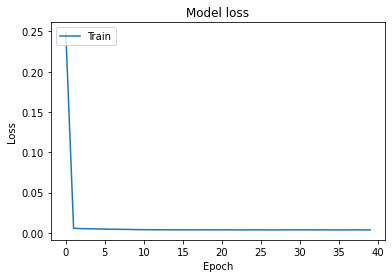

In [9]:
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Đánh giá

In [10]:
from sklearn.metrics import accuracy_score
prediction = model.predict(X_test)


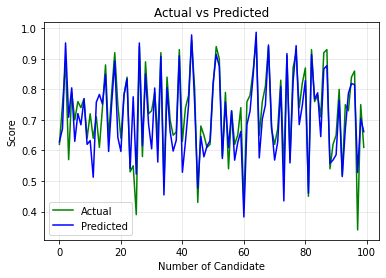

In [11]:
plt.plot(y_test, color = 'green', label = 'Actual')
plt.plot(prediction, color = 'blue', label = 'Predicted')
plt.grid(alpha = 0.3)
plt.xlabel('Number of Candidate')
plt.ylabel('Score')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

In [12]:
from sklearn.metrics import r2_score
print("r_square score: ", r2_score(y_test,prediction))
train_prediction = model.predict(X_train)
print("r_square score (train dataset): ", r2_score(y_train,train_prediction))

r_square score:  0.7974865261272338
r_square score (train dataset):  0.8198379620950688


In [13]:
# Tính loss:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.0039


0.003910737112164497

# Bài tập

## Regression sử dụng DNN với bộ dữ liệu housing-data.csv (dự đoán giá nhà)